## 一、理解赛题

在比赛中要求我们根据选手的赛局数据推测出游戏的结果，根据我们平时的游戏经验，一般来说经济差高的，人头差比较大的，输出比较高的一般都能够取得最后胜利，这体现了数据的**相关性**，那接下来我们就要尝试找到一个具体的函数来描绘不同数据对游戏结果的影响

### 二、数据处理
数据由比赛提供，我们直接用pandas包读取就行

In [29]:
# !unzip -d data/ data/data137276/test.csv.zip
# !unzip -d data/ data/data137276/train.csv.zip

In [28]:
import numpy as np
import pandas as pd

x_train = pd.read_csv('data/train.csv').drop('win',axis=1)
y_train = pd.read_csv('data/train.csv')['win']
x_test = pd.read_csv('data/test.csv')

In [83]:
x_train

,id,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,1,5,2,0,1,569,0,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,5,8,7,3,1,880,0,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,6,16,0,1,593,0,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,1,2,0,0,1,381,0,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,4,11,25,0,1,455,0,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,6,12,0,1,362,0,0,0,...,3,5751,0,14786,2374,12309,102,12,1,0
179996,179996,7,3,4,5,1,574,0,0,0,...,2,8907,0,11019,3933,6533,552,7,2,0
179997,179997,9,0,9,9,1,0,0,0,0,...,4,6627,0,14279,3661,10617,0,7,2,1
179998,179998,14,1,5,10,2,980,3,0,0,...,1,1943,0,19165,4818,14110,236,6,0,0


In [84]:
x_test

,id,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,180000,8,7,5,2,1,874,0,0,0,...,1,0,0,20112,6704,12945,462,10,3,0
1,180001,4,8,5,2,1,978,0,0,0,...,1,4974,0,49389,19109,29651,629,15,2,0
2,180002,19,6,8,10,2,912,5,0,0,...,3,5653,0,26606,8344,17627,634,14,2,0
3,180003,1,8,6,0,1,519,0,0,0,...,1,3988,0,25852,5111,19552,1189,5,3,0
4,180004,1,10,12,0,1,646,0,0,0,...,5,465,0,34486,16690,16882,914,39,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,199995,2,9,28,0,1,886,0,0,0,...,5,1081,0,34860,14476,19691,692,22,1,0
19996,199996,1,2,2,0,1,383,0,0,0,...,1,478,0,15828,1375,14404,48,8,0,0
19997,199997,2,9,4,0,1,387,0,0,0,...,1,0,0,22255,4189,16467,1598,0,0,1
19998,199998,0,5,0,0,0,381,0,0,0,...,1,1285,0,11519,4679,6839,0,4,0,0


我们这里把x_train和x_test拼接起来,方便等会做特征工程

In [29]:
feature = pd.concat([x_train, x_test])

In [34]:
feature

,id,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,1,5,2,0,1,569,0,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,5,8,7,3,1,880,0,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,6,16,0,1,593,0,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,1,2,0,0,1,381,0,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,4,11,25,0,1,455,0,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,199995,2,9,28,0,1,886,0,0,0,...,5,1081,0,34860,14476,19691,692,22,1,0
19996,199996,1,2,2,0,1,383,0,0,0,...,1,478,0,15828,1375,14404,48,8,0,0
19997,199997,2,9,4,0,1,387,0,0,0,...,1,0,0,22255,4189,16467,1598,0,0,1
19998,199998,0,5,0,0,0,381,0,0,0,...,1,1285,0,11519,4679,6839,0,4,0,0


可以用describe方法和info方法查看数据的基本情况,我们拿到手的数据除了一血情况以外基本都是连续型的,并且数据中没有缺失值,另外在回归问题中数据的异常值经常用箱线图来判断

In [35]:
feature.describe()

,id,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,5.798545,5.810190,8.322870,2.671450,1.332095,630.531655,0.540265,0.073220,0.010235,...,2.253135,2138.209810,0.0,23226.733180,8136.551010,14039.533350,1049.892170,11.508290,1.782860,0.100380
std,57735.171256,4.605316,3.263815,5.933893,2.537784,0.758037,311.568408,0.924831,0.295887,0.104548,...,2.481890,2934.306106,0.0,11873.669826,5161.055339,7754.110833,1266.146212,7.539761,2.226049,0.300507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49999.750000,2.000000,3.000000,4.000000,0.000000,1.000000,433.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,15264.000000,4521.000000,8627.000000,274.000000,7.000000,0.000000,0.000000
50%,99999.500000,5.000000,6.000000,7.000000,2.000000,1.000000,590.000000,0.000000,0.000000,0.000000,...,1.000000,986.000000,0.0,21531.000000,7246.000000,12803.000000,656.000000,10.000000,1.000000,0.000000
75%,149999.250000,8.000000,8.000000,12.000000,4.000000,2.000000,792.000000,1.000000,0.000000,0.000000,...,3.000000,3222.250000,0.0,29465.250000,10739.000000,18205.000000,1352.000000,14.000000,3.000000,0.000000
max,199999.000000,39.000000,23.000000,52.000000,31.000000,5.000000,3038.000000,11.000000,7.000000,4.000000,...,98.000000,55083.000000,0.0,118130.000000,71631.000000,73172.000000,25140.000000,322.000000,48.000000,1.000000


In [36]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   id                      200000 non-null  int64
 1   kills                   200000 non-null  int64
 2   deaths                  200000 non-null  int64
 3   assists                 200000 non-null  int64
 4   largestkillingspree     200000 non-null  int64
 5   largestmultikill        200000 non-null  int64
 6   longesttimespentliving  200000 non-null  int64
 7   doublekills             200000 non-null  int64
 8   triplekills             200000 non-null  int64
 9   quadrakills             200000 non-null  int64
 10  pentakills              200000 non-null  int64
 11  totdmgdealt             200000 non-null  int64
 12  magicdmgdealt           200000 non-null  int64
 13  physicaldmgdealt        200000 non-null  int64
 14  truedmgdealt            200000 non-null  int64
 15  l

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.FacetGrid(pd.melt(feature), col="variable",  col_wrap=4, sharex=False, sharey=False).map(sns.distplot, "value")

/home/zhangzrjerry/anaconda3/envs/globalenv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/zhangzrjerry/anaconda3/envs/globalenv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

Error in callback <function flush_figures at 0x7f252de1dfc0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot: >

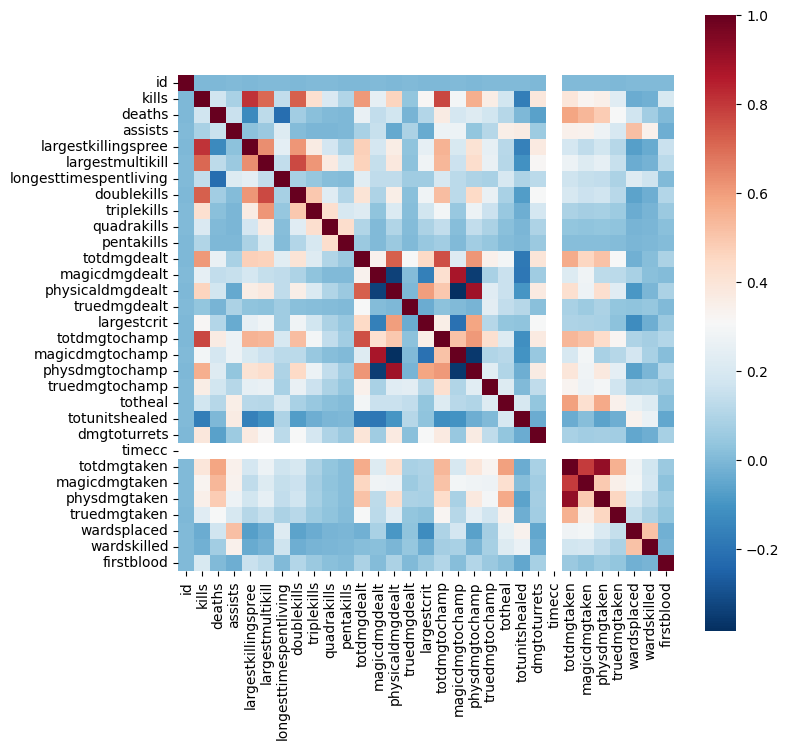

In [ ]:
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=feature.corr(),square=True,cmap='RdBu_r')

整体来看数据相关性较弱,除了一血以外还有几个离散变量如双杀次数、三杀次数、四杀次数等，而timecc的值都是零等会要去掉这个没有影响的变量,id在训练的时候也要去掉

In [30]:
from category_encoders import *

columns= ['kills','deaths','assists', 'largestkillingspree',
    'largestmultikill', 'longesttimespentliving', 'doublekills',
    'triplekills', 'quadrakills', 'pentakills','firstblood']
m_feature = OrdinalEncoder(cols=columns).fit(feature).transform(feature)
m_feature.columns=[
    'id', 'akills', 'adeaths', 'aassists', 'alargestkillingspree',
       'alargestmultikill', 'alongesttimespentliving', 'adoublekills',
       'atriplekills', 'aquadrakills', 'apentakills', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp',
       'totheal', 'totunitshealed', 'dmgtoturrets', 'timecc', 'totdmgtaken',
       'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'wardsplaced',
       'wardskilled', 'afirstblood'
]
m_feature=pd.concat([m_feature,feature[columns]],axis=1).drop(['timecc','id'],axis=1)

In [87]:
m_feature

,akills,adeaths,aassists,alargestkillingspree,alargestmultikill,alongesttimespentliving,adoublekills,atriplekills,aquadrakills,apentakills,...,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,firstblood
0,1,1,1,1,1,1,1,1,1,1,...,5,2,0,1,569,0,0,0,0,0
1,2,2,2,2,1,2,1,1,1,1,...,8,7,3,1,880,0,0,0,0,0
2,1,3,3,1,1,3,1,1,1,1,...,6,16,0,1,593,0,0,0,0,0
3,1,4,4,1,1,4,1,1,1,1,...,2,0,0,1,381,0,0,0,0,0
4,3,5,5,1,1,5,1,1,1,1,...,11,25,0,1,455,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,12,28,1,1,50,1,1,1,1,...,9,28,0,1,886,0,0,0,0,0
19996,1,4,1,1,1,30,1,1,1,1,...,2,2,0,1,383,0,0,0,0,0
19997,10,12,16,1,1,548,1,1,1,1,...,9,4,0,1,387,0,0,0,0,1
19998,8,1,4,1,4,4,1,1,1,1,...,5,0,0,0,381,0,0,0,0,0


再对数据做一个归一化处理

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(m_feature)
feature = sc.transform(m_feature)

In [42]:
np.shape(feature)

(200000, 40)

In [43]:
pd.DataFrame(feature).to_csv('pretrain/feature.csv',index=False)

In [45]:
x_train = feature[:180000]
x_test = feature[180000:]

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgbpred = xgb.predict(feature)

In [47]:
pd.DataFrame(xgbpred).to_csv('pretrain/xgboost.csv',index=False)

In [48]:
from lightgbm.sklearn import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbmpred = lgbm.predict(feature)

In [49]:
pd.DataFrame(lgbmpred).to_csv('pretrain/lightgbm.csv',index=False)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(feature)

In [51]:
pd.DataFrame(rfcpred).to_csv('pretrain/forest.csv',index=False)

In [52]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(x_train, y_train)
rcpred = rc.predict(feature)

In [53]:
pd.DataFrame(rcpred).to_csv('pretrain/ridge.csv',index=False)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
knc.predict(feature)

array([0, 0, 1, ..., 0, 0, 1])

In [55]:
pd.DataFrame(rcpred).to_csv('pretrain/neighbors.csv',index=False)

In [62]:
feature = np.concatenate([
    pd.read_csv('pretrain/feature.csv'),
    pd.read_csv('pretrain/neighbors.csv'),
    pd.read_csv('pretrain/forest.csv'),
    pd.read_csv('pretrain/ridge.csv'),
    pd.read_csv('pretrain/xgboost.csv'),
    pd.read_csv('pretrain/lightgbm.csv')
],axis=1)

In [65]:
pd.DataFrame(feature[:180000]).to_csv('pretrain/train_feature.csv',index=False)
pd.DataFrame(feature[180000:]).to_csv('pretrain/test_feature.csv',index=False)

In [63]:
feature.shape

(200000, 45)

## 三、模型搭建

In [13]:
from paddle import nn
import paddle

class MyNet(nn.Layer):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(45, 90)
        self.dr1 = nn.Dropout()
        self.fc2 = nn.Linear(135, 45)
        self.dr2 = nn.Dropout()
        self.fc3 = nn.Linear(90, 1)
        pass
    def forward(self, input):
        x = self.fc1(input)
        x = paddle.concat([input, x],axis=1)
        x = self.dr1(x)
        x = self.fc2(x)
        x = paddle.concat([input, x],axis=1)
        x = self.dr2(x)
        x = self.fc3(x)
        return x
    pass

In [8]:
paddle.summary(MyNet(),(180000,45))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-4        [[180000, 45]]        [180000, 90]          4,140     
   Dropout-3      [[180000, 135]]       [180000, 135]            0       
   Linear-5       [[180000, 135]]        [180000, 45]          6,120     
   Dropout-4       [[180000, 90]]        [180000, 90]            0       
   Linear-6        [[180000, 90]]        [180000, 1]            91       
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 30.90
Forward/backward pass size (MB): 495.76
Params size (MB): 0.04
Estimated Total Size (MB): 526.70
---------------------------------------------------------------------------



{'total_params': 10351, 'trainable_params': 10351}

## 四、模型训练

In [3]:
class MyDataset(paddle.io.Dataset):
    def __init__(self, data, label) -> None:
        super(MyDataset, self).__init__()
        assert len(data)==len(label)
        self.data = data
        self.label = label
        pass
    def __getitem__(self, idx):
        return np.array(self.data[idx]).astype('float32'), np.array(self.label[idx]).astype('float32')
    def __len__(self):
        return len(self.data)
    pass
# MyDataset(x_train,y_train)[0]

In [2]:
import paddle.nn.functional as F
import paddle

def train_pm(model, optimizer, mydataset, epoches=1):
    # 开启0号GPU训练
    paddle.device.set_device('gpu:0')

    print('start training ... ')
    model.train()
    # 定义数据读取器，训练数据读取器和验证数据读取器
    train_loader = paddle.io.DataLoader(mydataset,batch_size=180000,shuffle=True,drop_last=True)
    valid_loader = paddle.io.DataLoader(mydataset,batch_size=180000,shuffle=True,drop_last=True)
    for epoch in range(epoches):
        for batch_id, data in enumerate(train_loader()):
            x_data, y_data = data
            img = paddle.to_tensor(x_data)
            label = paddle.reshape(paddle.to_tensor(y_data),(-1,1))
            # 运行模型前向计算，得到预测值
            logits = model(img)
            loss = F.binary_cross_entropy_with_logits(logits, label)
            avg_loss = paddle.mean(loss)

            if batch_id % 5 == 4:
                print("epoch: {}, batch_id: {}, loss is: {:.4f}".format(epoch, batch_id, float(avg_loss.numpy())))
            # 反向传播，更新权重，清除梯度
            avg_loss.backward()
            optimizer.step()
            optimizer.clear_grad()

        model.eval()
        accuracies = []
        losses = []
        for batch_id, data in enumerate(valid_loader()):
            x_data, y_data = data
            img = paddle.to_tensor(x_data)
            label = paddle.reshape(paddle.to_tensor(y_data),(-1,1))
            # 运行模型前向计算，得到预测值
            logits = model(img)
            # 二分类，sigmoid计算后的结果以0.5为阈值分两个类别
            # 计算sigmoid后的预测概率，进行loss计算
            pred = F.sigmoid(logits)
            loss = F.binary_cross_entropy_with_logits(logits, label)
            # 计算预测概率小于0.5的类别
            pred2 = pred * (-1.0) + 1.0
            # 得到两个类别的预测概率，并沿第一个维度级联
            pred = paddle.concat([pred2, pred], axis=1)
            acc = paddle.metric.accuracy(pred, paddle.cast(label, dtype='int64'))

            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        print("[validation] accuracy/loss: {:.4f}/{:.4f}".format(np.mean(accuracies), np.mean(losses)))
        model.train()

        paddle.save(model.state_dict(), 'palmp{}_{}.pdparams'.format(epoch,acc.numpy()))

In [14]:
import pandas as pd
import numpy as np

mydataset = MyDataset(
    np.array(pd.read_csv('pretrain/train_feature.csv')),
    pd.read_csv('data/train.csv')['win']
)
mynet = MyNet()

W0207 18:06:33.189246  4829 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.1, Driver API Version: 12.0, Runtime API Version: 11.7
W0207 18:06:33.206691  4829 gpu_resources.cc:91] device: 0, cuDNN Version: 8.7.


In [10]:
len(mydataset)

180000

In [15]:
train_pm(
    mynet,
    paddle.optimizer.Adam(parameters=mynet.parameters(), learning_rate=0.01),
    mydataset,
    10
)

start training ... 
[validation] accuracy/loss: 0.5011/0.6455
[validation] accuracy/loss: 0.8229/0.5244
[validation] accuracy/loss: 0.8445/0.4252
[validation] accuracy/loss: 0.8436/0.4083
[validation] accuracy/loss: 0.8443/0.4139
[validation] accuracy/loss: 0.8503/0.3985
[validation] accuracy/loss: 0.8534/0.3958
[validation] accuracy/loss: 0.8546/0.4042
[validation] accuracy/loss: 0.8593/0.4050
[validation] accuracy/loss: 0.8613/0.3927


In [22]:
def predict(model, dataloader):
    model.eval()
    for idx, data in enumerate(dataloader):
        print('\r{}/{}'.format(1+idx,len(dataloader)),end='')
        x_data, filename = data
        img = paddle.to_tensor(x_data)
        # 运行模型前向计算，得到预测值
        logits = model(img)
        # 二分类，sigmoid计算后的结果以0.5为阈值分两个类别
        # 计算sigmoid后的预测概率，进行loss计算
        pred = F.sigmoid(logits)
    return pred

In [23]:
pred_y = predict(mynet,
    paddle.io.DataLoader(
        MyDataset(
            np.array(pd.read_csv('pretrain/test_feature.csv')),
            np.zeros(20000)
        ),
        batch_size=20000,
        shuffle=False
    )
)

1/1

In [37]:
np.info(pred_y.numpy())

class:  ndarray
shape:  (20000, 1)
strides:  (4, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x44a7d0d0
byteorder:  little
byteswap:  False
type: float32


In [38]:
pd.DataFrame(np.where(pred_y.numpy()>0.5,1,0),columns=['win']).to_csv('submission.csv',index=False)

In [39]:
!zip result/submission.zip submission.csv
!rm submission.csv
# 84.955

updating: submission.csv (deflated 90%)


## 五、模型调优

更换为SGD优化器,减少学习次数,但是训练次数要更大

In [44]:
mynet = MyNet()
train_pm(
    mynet,
    paddle.optimizer.SGD(parameters=mynet.parameters(), learning_rate=0.01),
    mydataset,
    75
)

start training ... 
[validation] accuracy/loss: 0.8280/0.5419
[validation] accuracy/loss: 0.8295/0.5403
[validation] accuracy/loss: 0.8313/0.5387
[validation] accuracy/loss: 0.8327/0.5371
[validation] accuracy/loss: 0.8344/0.5356
[validation] accuracy/loss: 0.8359/0.5341
[validation] accuracy/loss: 0.8373/0.5326
[validation] accuracy/loss: 0.8386/0.5311
[validation] accuracy/loss: 0.8398/0.5296
[validation] accuracy/loss: 0.8408/0.5282
[validation] accuracy/loss: 0.8418/0.5268
[validation] accuracy/loss: 0.8427/0.5254
[validation] accuracy/loss: 0.8435/0.5240
[validation] accuracy/loss: 0.8442/0.5226
[validation] accuracy/loss: 0.8451/0.5212
[validation] accuracy/loss: 0.8457/0.5199
[validation] accuracy/loss: 0.8465/0.5186
[validation] accuracy/loss: 0.8470/0.5173
[validation] accuracy/loss: 0.8476/0.5160
[validation] accuracy/loss: 0.8482/0.5147
[validation] accuracy/loss: 0.8487/0.5134
[validation] accuracy/loss: 0.8493/0.5122
[validation] accuracy/loss: 0.8498/0.5110


KeyboardInterrupt: 

In [45]:
pred_y = predict(mynet,
    paddle.io.DataLoader(
        MyDataset(
            np.array(pd.read_csv('pretrain/test_feature.csv')),
            np.zeros(20000)
        ),
        batch_size=20000,
        shuffle=False
    )
)

1/1

In [46]:
pd.DataFrame(np.where(pred_y.numpy()>0.5,1,0),columns=['win']).to_csv('submission.csv',index=False)

In [47]:
!zip result/submission.zip submission.csv
!rm submission.csv
# 

  adding: submission.csv (deflated 90%)


In [14]:
from gplearn.genetic import SymbolicTransformer
function_set = ['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'abs', 'neg', 'max', 'min']

st = SymbolicTransformer(
    generations=2,
    population_size=1000,
    hall_of_fame=100,
    n_components=10,
    function_set=function_set,
    parsimony_coefficient=0.0005,
    max_samples=0.9,
    verbose=1,
    random_state=0,
    n_jobs=3
)

In [15]:
import numpy as np
import pandas as pd
st.fit(np.array(pd.read_csv('pretrain/train_feature.csv').drop(['40','41','42','43','44'],axis=1)),np.array(pd.read_csv('data/train.csv')['win']))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.03        0.0967885        4         0.395269         0.413457     15.94s
   1     6.91         0.250165        5         0.512841         0.518938      0.00s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt',
                                  'abs', 'neg', 'max', 'min'],
                    generations=2, max_samples=0.9, n_jobs=3,
                    parsimony_coefficient=0.0005, random_state=0, verbose=1)

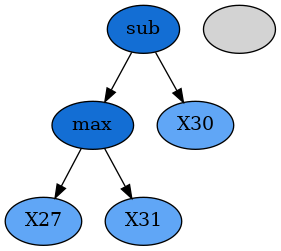

In [16]:
from IPython.display import Image
import pydotplus
graph = st._best_programs[0].export_graphviz()
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

In [65]:
pd.DataFrame(
    np.concatenate(
        [
            st.transform(
                np.array(
                    pd.read_csv('pretrain/train_feature.csv').drop(['40','41','42','43','44'],axis=1)
                )
            ),
            np.array(
                pd.read_csv('pretrain/train_feature.csv')
            )
        ],
        axis=1
    )
).to_csv('pretrain/gptrain.csv',index=False)

In [64]:
pd.DataFrame(
    np.concatenate(
        [
            st.transform(
                np.array(
                    pd.read_csv('pretrain/test_feature.csv').drop(['40','41','42','43','44'],axis=1)
                )
            ),
            np.array(
                pd.read_csv('pretrain/test_feature.csv')
            )
        ],
        axis=1
    )
).to_csv('pretrain/gptest.csv',index=False)

In [22]:
pd.DataFrame(
    st.transform(
        np.array(
            pd.read_csv('pretrain/test_feature.csv').drop(['40','41','42','43','44'],axis=1)
        )
    )
).to_csv('pretrain/onlygptest.csv')
pd.DataFrame(
    st.transform(
        np.array(
            pd.read_csv('pretrain/train_feature.csv').drop(['40','41','42','43','44'],axis=1)
        )
    )
).to_csv('pretrain/onlygptrain.csv')

In [93]:
from paddle import nn
import paddle
import paddle.nn.functional as F

class MyNet(nn.Layer):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(55, 55)
        self.dr1 = nn.Dropout()
        self.fc2 = nn.Linear(110, 55)
        self.dr2 = nn.Dropout()
        self.fc3 = nn.Linear(55, 10)
        self.fc4 = nn.Linear(20, 4)
        self.fc5 = nn.Linear(5, 1)
        pass
    def forward(self, input):
        x = self.fc1(input)
        x = paddle.concat([x, input],axis=1)
        x = F.relu(x)
        x = self.dr1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dr2(x)
        x = self.fc3(x)
        x = paddle.concat([x, input[:,:10]],axis=1)
        x = F.relu(x)
        x = self.fc4(x)
        x = paddle.concat([x, input[:,-2:-1]],axis=1)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.sigmoid(x)
        return x
    pass

In [94]:
paddle.summary(MyNet(),(180000,55))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
  Linear-191       [[180000, 55]]        [180000, 55]          3,080     
  Dropout-77      [[180000, 110]]       [180000, 110]            0       
  Linear-192      [[180000, 110]]        [180000, 55]          6,105     
  Dropout-78       [[180000, 55]]        [180000, 55]            0       
  Linear-193       [[180000, 55]]        [180000, 10]           560      
  Linear-194       [[180000, 20]]        [180000, 4]            84       
  Linear-195       [[180000, 5]]         [180000, 1]             6       
Total params: 9,835
Trainable params: 9,835
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 37.77
Forward/backward pass size (MB): 398.25
Params size (MB): 0.04
Estimated Total Size (MB): 436.06
--------------------------------------------------------------------

{'total_params': 9835, 'trainable_params': 9835}

In [25]:
paddle.randn([10])[0]

W0208 18:56:39.331553  9579 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.1, Driver API Version: 12.0, Runtime API Version: 11.7
W0208 18:56:39.348405  9579 gpu_resources.cc:91] device: 0, cuDNN Version: 8.7.


Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-1.99038506])

In [95]:
import paddle.nn.functional as F
import paddle

def train_pm(model, optimizer, feature, label, epoches=1):
    # 开启0号GPU训练
    paddle.device.set_device('gpu:0')

    print('start training ... ')
    model.train()    
    for epoch in range(epoches):
        feature = paddle.to_tensor(feature)
        label = paddle.reshape(paddle.to_tensor(label),(-1,1))
        # 运行模型前向计算，得到预测值
        logits = model(feature)
        loss = F.binary_cross_entropy_with_logits(logits, label)
        avg_loss = paddle.mean(loss)
        # 反向传播，更新权重，清除梯度
        avg_loss.backward()
        optimizer.step()
        optimizer.clear_grad()

        model.eval()
        accuracies = []
        losses = []

        # 运行模型前向计算，得到预测值
        logits = model(feature)
        # 二分类，sigmoid计算后的结果以0.5为阈值分两个类别
        # 计算sigmoid后的预测概率，进行loss计算
        pred = F.sigmoid(logits)
        loss = F.binary_cross_entropy_with_logits(logits, label)
        # 计算预测概率小于0.5的类别
        pred2 = pred * (-1.0) + 1.0
        # 得到两个类别的预测概率，并沿第一个维度级联
        pred = paddle.concat([pred2, pred], axis=1)
        acc = paddle.metric.accuracy(pred, paddle.cast(label, dtype='int64'))

        accuracies.append(acc.numpy())
        losses.append(loss.numpy())

        print("[validation] accuracy/loss: {:.4f}/{:.4f}".format(np.mean(accuracies), np.mean(losses)))
        model.train()

        paddle.save(model.state_dict(), 'palmp{}_{}.pdparams'.format(epoch,acc.numpy()))

In [96]:
mynet = MyNet()
train_pm(
    mynet,
    paddle.optimizer.Adam(
        parameters=mynet.parameters(),
        learning_rate=0.01
    ),
    np.array(
        pd.read_csv('pretrain/gptrain.csv')
    ).astype('float32'),
    np.array(
        pd.read_csv('data/train.csv')['win']
    ).astype('float32'),
    20
)

start training ... 
[validation] accuracy/loss: 0.4999/0.6869
[validation] accuracy/loss: 0.4999/0.6702
[validation] accuracy/loss: 0.4999/0.6498
[validation] accuracy/loss: 0.4999/0.6286
[validation] accuracy/loss: 0.4999/0.6109
[validation] accuracy/loss: 0.4999/0.5987
[validation] accuracy/loss: 0.4999/0.5911
[validation] accuracy/loss: 0.4999/0.5859
[validation] accuracy/loss: 0.5004/0.5817
[validation] accuracy/loss: 0.5059/0.5786
[validation] accuracy/loss: 0.5354/0.5766
[validation] accuracy/loss: 0.6131/0.5753
[validation] accuracy/loss: 0.7099/0.5744
[validation] accuracy/loss: 0.7863/0.5739
[validation] accuracy/loss: 0.8221/0.5735
[validation] accuracy/loss: 0.8365/0.5731
[validation] accuracy/loss: 0.8457/0.5724
[validation] accuracy/loss: 0.8514/0.5711
[validation] accuracy/loss: 0.8550/0.5698
[validation] accuracy/loss: 0.8571/0.5692


In [88]:
mynet = MyNet()
mynet.eval()
mynet.load_dict(paddle.load('model/palmp6_[0.88212776].pdparams'))

In [98]:
mynet(
    paddle.to_tensor(
        np.array(
            pd.read_csv('pretrain/gptest.csv')
        ).astype('float32')
    )
).numpy().mean()

0.47705308

In [104]:
pd.DataFrame(
    np.where(
        mynet(
            paddle.to_tensor(
                np.array(
                    pd.read_csv('pretrain/gptest.csv')
                ).astype('float32')
            )
        ).numpy() > 0.5, 1, 0
    ),
    columns=['win']
).to_csv('submission.csv',index=False)

In [105]:
!zip result/submission.zip submission.csv
!rm submission.csv
# 

updating: submission.csv (deflated 90%)
